In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving SeoulBikeData.csv to SeoulBikeData.csv
User uploaded file "SeoulBikeData.csv" with length 604166 bytes


Importing required packages and reading the data

In [2]:
import pandas as pd
import numpy as np

# Load the data from the CSV file
file_path = 'SeoulBikeData.csv'
df = pd.read_csv(file_path, encoding='unicode_escape')

# Display the first few rows of the dataset
df.head(100)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0   01/12/2017                254     0             -5.2           37   
1   01/12/2017                204     1             -5.5           38   
2   01/12/2017                173     2             -6.0           39   
3   01/12/2017                107     3             -6.2           40   
4   01/12/2017                 78     4             -6.0           36   
..         ...                ...   ...              ...          ...   
95  04/12/2017                248    23             -5.8           44   
96  05/12/2017                216     0             -6.1           42   
97  05/12/2017                198     1             -6.5           41   
98  05/12/2017                124     2             -6.8           41   
99  05/12/2017                 62     3             -6.9           39   

    Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                2.2              2000                      -17.6   
1                0.8              2000                      -17.6   
2                1.0              2000                      -17.7   
3                0.9              2000                      -17.6   
4                2.3              2000                      -18.6   
..               ...               ...                        ...   
95               2.4              2000                      -16.1   
96               2.6              2000                      -16.9   
97               2.8              2000                      -17.6   
98               2.5              2000                      -17.8   
99               2.0              2000                      -18.5   

    Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                       0.0           0.0            0.0  Winter  No Holiday   
1                       0.0           0.0            0.0  Winter  No Holiday   
2                       0.0           0.0            0.0  Winter  No Holiday   
3                       0.0           0.0            0.0  Winter  No Holiday   
4                       0.0           0.0            0.0  Winter  No Holiday   
..                      ...           ...            ...     ...         ...   
95                      0.0           0.0            0.0  Winter  No Holiday   
96                      0.0           0.0            0.0  Winter  No Holiday   
97                      0.0           0.0            0.0  Winter  No Holiday   
98                      0.0           0.0            0.0  Winter  No Holiday   
99                      0.0           0.0            0.0  Winter  No Holiday   

   Functioning Day  
0              Yes  
1              Yes  
2              Yes  
3              Yes  
4              Yes  
..             ...  
95             Yes  
96             Yes  
97             Yes  
98             Yes  
99             Yes  

[100 rows x 14 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
#converting date to datetime column
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [5]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day'], drop_first=True)

In [6]:
df_encoded.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons_Spring  \
0                      0.0           0.0            0.0               0   
1                      0.0           0.0            0.0               0   
2                      0.0           0.0            0.0               0   
3                      0.0           0.0            0.0               0   
4                      0.0           0.0            0.0               0   

   Seasons_Summer  Seasons_Winter  Holiday_No Holiday  Functioning Day_Yes  
0               0               1                   1                    1  
1               0               1                   1                    1  
2               0               1                   1                    1  
3               0               1                   1                    1  
4               0               1                   1                    1

In [7]:
df_encoded.median()

<ipython-input-7-1e35833ddcd0>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_encoded.median()


Rented Bike Count             504.50
Hour                           11.50
Temperature(°C)                13.70
Humidity(%)                    57.00
Wind speed (m/s)                1.50
Visibility (10m)             1698.00
Dew point temperature(°C)       5.10
Solar Radiation (MJ/m2)         0.01
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
Seasons_Spring                  0.00
Seasons_Summer                  0.00
Seasons_Winter                  0.00
Holiday_No Holiday              1.00
Functioning Day_Yes             1.00
dtype: float64

In [8]:
#Checking for missing values in the dataset
df_encoded.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons_Spring               0
Seasons_Summer               0
Seasons_Winter               0
Holiday_No Holiday           0
Functioning Day_Yes          0
dtype: int64

In [9]:
#Checking for duplicate values in the dataset
df_encoded.duplicated().sum()

0

We can see that there are no duplicate values in our dataset hence we can proceed with out existing median value as our threshold for the rented bike count.

Higher the median value, higher the demand!

In [10]:
median_value = df_encoded['Rented Bike Count'].median()

In [11]:
df_encoded['High Demand'] = df_encoded['Rented Bike Count'] > median_value

In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons_Spring             8760 non-null   uint8         
 12  Season

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Select the specified columns for the tree model
specified_columns = [ 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
'Solar Radiation (MJ/m2)',
'Rainfall(mm)',
'Snowfall (cm)', 'Seasons_Spring', 'Seasons_Summer','Seasons_Winter','Holiday_No Holiday', 'Functioning Day_Yes']
specified_columns

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Holiday_No Holiday',
 'Functioning Day_Yes']

In [14]:
df_encoded["High Demand"] = df_encoded["High Demand"].astype(int)

In [15]:
# Separate features and target variable
X_specified = df_encoded[specified_columns]
X_specified.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0             -5.2           37               2.2              2000   
1     1             -5.5           38               0.8              2000   
2     2             -6.0           39               1.0              2000   
3     3             -6.2           40               0.9              2000   
4     4             -6.0           36               2.3              2000   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                      -17.6                      0.0           0.0   
1                      -17.6                      0.0           0.0   
2                      -17.7                      0.0           0.0   
3                      -17.6                      0.0           0.0   
4                      -18.6                      0.0           0.0   

   Snowfall (cm)  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0            0.0               0               0               1   
1            0.0               0               0               1   
2            0.0               0               0               1   
3            0.0               0               0               1   
4            0.0               0               0               1   

   Holiday_No Holiday  Functioning Day_Yes  
0                   1                    1  
1                   1                    1  
2                   1                    1  
3                   1                    1  
4                   1                    1

In [16]:
y_specified = df_encoded['High Demand']
y_specified.head()

0    0
1    0
2    0
3    0
4    0
Name: High Demand, dtype: int64

Data preparation and data splitting to train our models

In [17]:
# Split the data into training and test sets
X_train_specified, X_test_specified, y_train_specified, y_test_specified = train_test_split(
    X_specified, y_specified, test_size=0.2, random_state=42
)

# Print the shapes of the training and test sets
print(X_train_specified.shape)
print(X_test_specified.shape)

(7008, 14)
(1752, 14)


#Decision Tree Classifier

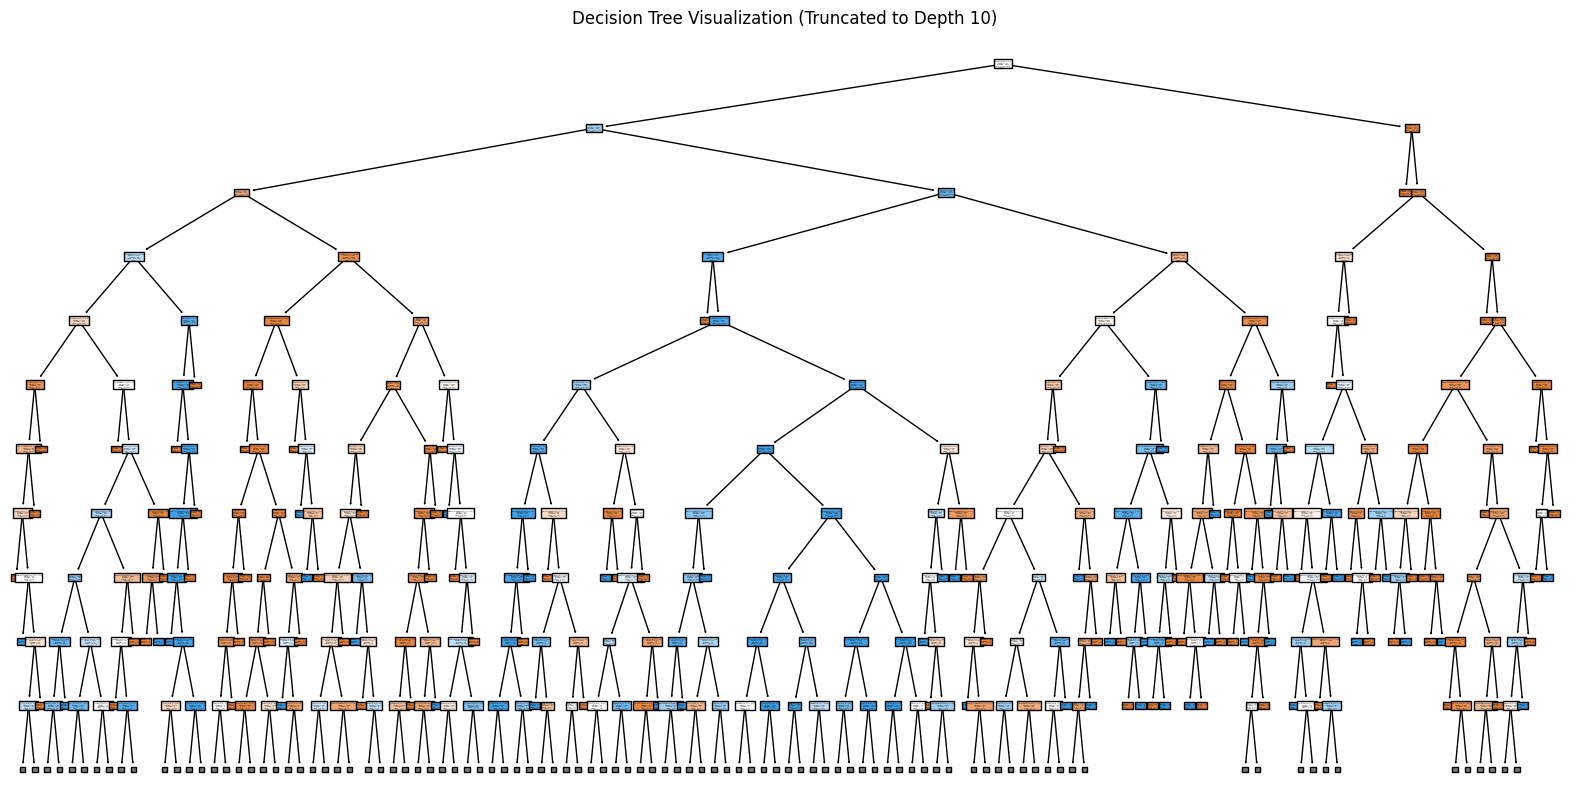

In [18]:
# Initialize and train the Decision Tree Classifier with entropy criterion
tree_clf_specified = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf_specified.fit(X_train_specified, y_train_specified)

# Visualize the result
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Limit the depth of the tree to make it more interpretable
plt.figure(figsize=(20, 10))
plot_tree(tree_clf_specified, max_depth=10, filled=True, feature_names=specified_columns, class_names=['0', '1'])
plt.title('Decision Tree Visualization (Truncated to Depth 10)')
plt.show()

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

text_representation = tree.export_text(tree_clf_specified, feature_names=specified_columns, max_depth=1)
print(text_representation)

|--- Seasons_Winter <= 0.50
|   |--- Hour <= 6.50
|   |   |--- truncated branch of depth 17
|   |--- Hour >  6.50
|   |   |--- truncated branch of depth 23
|--- Seasons_Winter >  0.50
|   |--- Hour <= 7.50
|   |   |--- class: 0
|   |--- Hour >  7.50
|   |   |--- truncated branch of depth 18



In [20]:
# Evaluate the accuracy

# Make predictions on the test set
y_pred_specified = tree_clf_specified.predict(X_train_specified)
y_pred_specified

array([1, 1, 1, ..., 1, 0, 1])

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate the model
accuracy_specified = accuracy_score(y_train_specified, y_pred_specified)
print('Train Accuracy:',accuracy_specified)

Train Accuracy: 1.0


In [22]:
# Generate the confusion matrix
cm = confusion_matrix(y_train_specified, y_pred_specified)

# Convert the numpy array to a Pandas DataFrame
# For binary classification, labels are typically [0, 1]
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                3495                   0
Actual Positive                   0                3513


In [23]:
print(classification_report(y_train_specified, y_pred_specified))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3495
           1       1.00      1.00      1.00      3513

    accuracy                           1.00      7008
   macro avg       1.00      1.00      1.00      7008
weighted avg       1.00      1.00      1.00      7008



In [24]:
# Make predictions on the test set
y_pred_specified = tree_clf_specified.predict(X_test_specified)

# Evaluate the model
accuracy_specified = accuracy_score(y_test_specified, y_pred_specified)
print('Test Accuracy:',accuracy_specified)

Test Accuracy: 0.9103881278538812


In [25]:
# Make predictions on the test set
y_pred_specified = tree_clf_specified.predict(X_test_specified)

# Evaluate the model
accuracy_specified = accuracy_score(y_test_specified, y_pred_specified)
print('Test Accuracy:',accuracy_specified)

Test Accuracy: 0.9103881278538812


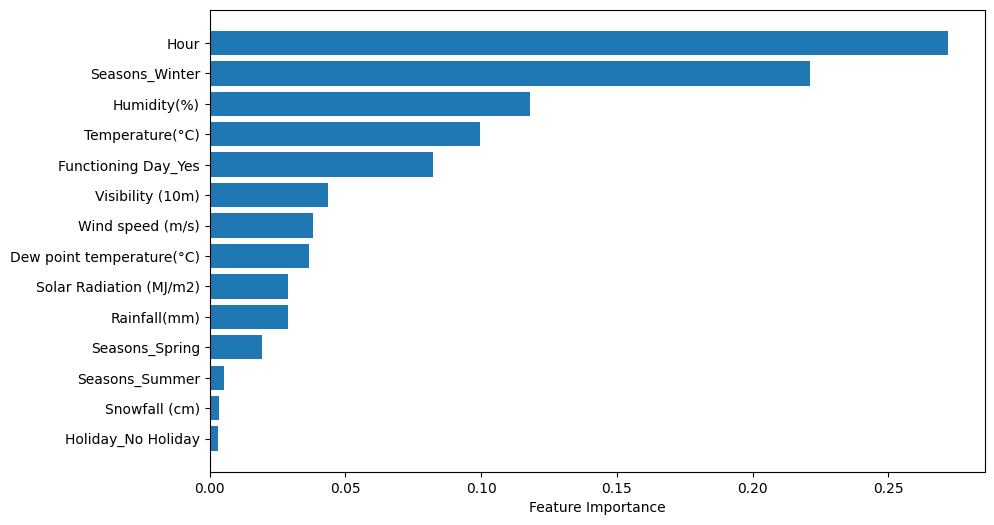

In [26]:
import numpy as np
# Get feature importances and feature names
feature_importances = tree_clf_specified.feature_importances_
feature_names = X_train_specified.columns

# Sort them by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(X_train_specified.shape[1]), feature_importances[sorted_idx], align='center')
plt.yticks(range(X_train_specified.shape[1]), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()  # reverse the order to have the most important at the top
plt.show()

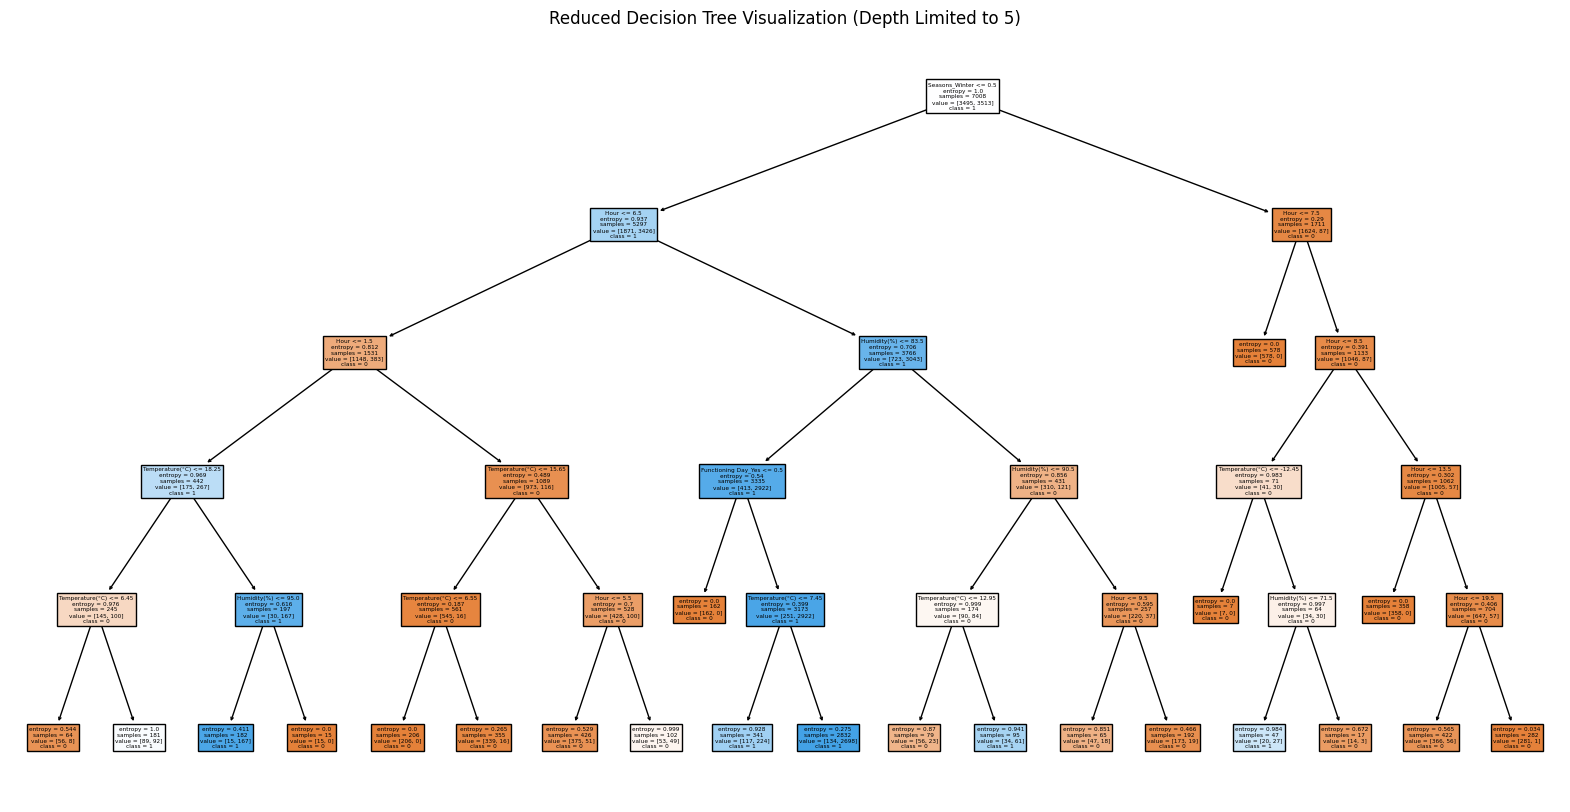

Test Accuracy: 0.910958904109589


In [27]:
# Select a subset of the specified columns based on feature importance or domain knowledge
reduced_columns = [ 'Hour', 'Seasons_Winter', 'Humidity(%)', 'Temperature(°C)','Functioning Day_Yes','Visibility (10m)']

# Rationale: These variables are selected based on their potential to impact the target variable 'target90'.
# They include key financial metrics, shipping-related features, and customer interaction metrics.

# Prepare the reduced feature set
X_reduced = df_encoded[reduced_columns]
y_reduced = df_encoded['High Demand']

# Split the data into training and test sets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y_reduced, test_size=0.2, random_state=42
)

# Initialize and train the Decision Tree Classifier with entropy criterion and limited depth
tree_clf_reduced = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
tree_clf_reduced.fit(X_train_reduced, y_train_reduced)

# Make predictions on the test set
y_pred_reduced = tree_clf_reduced.predict(X_test_reduced)

# Evaluate the model
accuracy_reduced = accuracy_score(y_test_reduced, y_pred_reduced)

# Visualize the reduced model
plt.figure(figsize=(20, 10))
plot_tree(tree_clf_reduced, filled=True, feature_names=reduced_columns, class_names=['0', '1'])
plt.title('Reduced Decision Tree Visualization (Depth Limited to 5)')
plt.show()

# Evaluate the model
print('Test Accuracy:',accuracy_reduced)

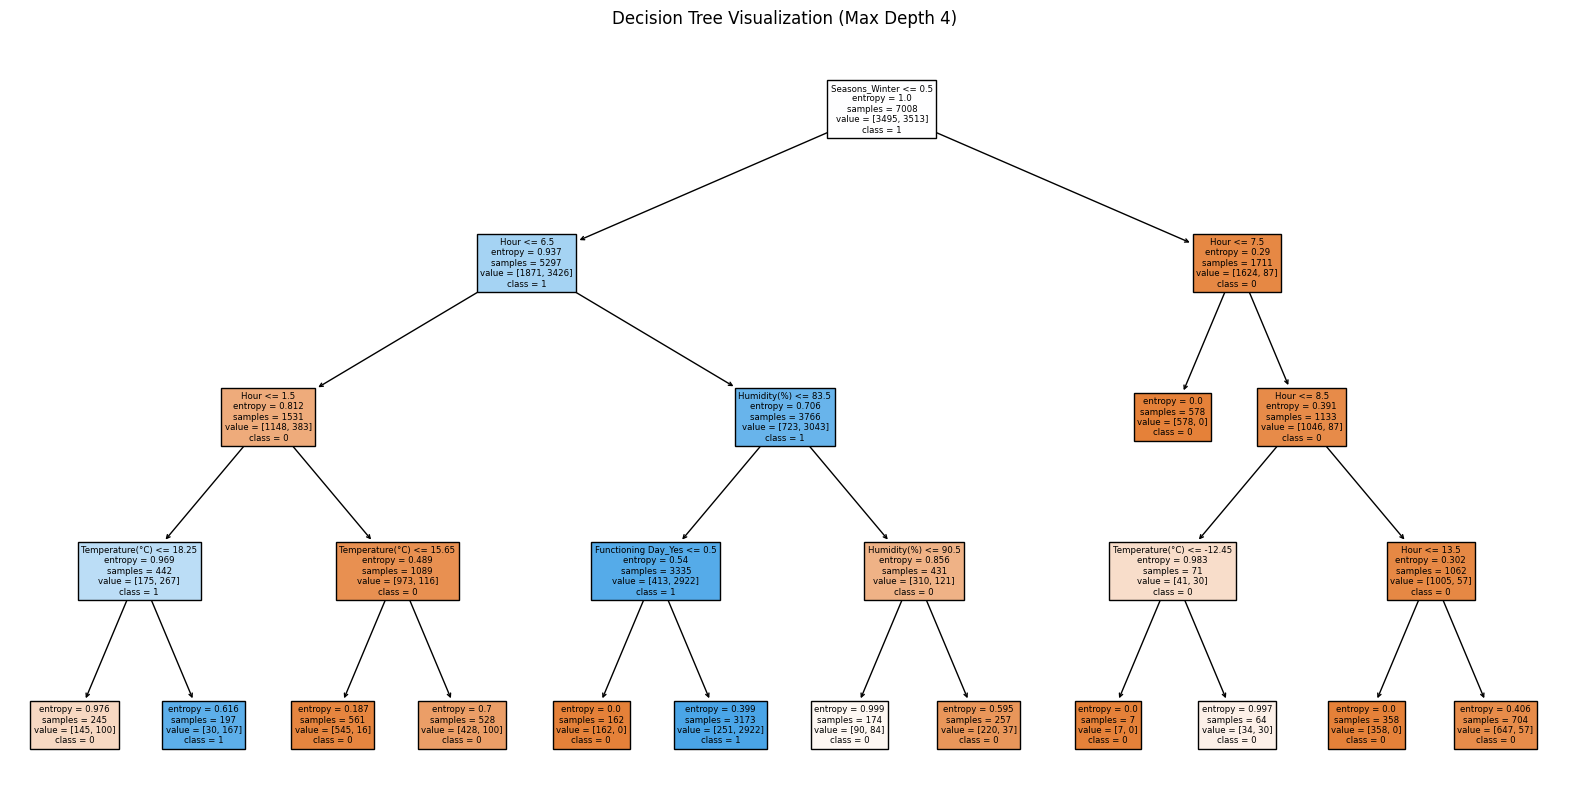

Test Accuracy: 0.9001141552511416


In [28]:
# Initialize and train another Decision Tree Classifier with entropy criterion and a different max depth (e.g., 4)
tree_clf_depth3 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
tree_clf_depth3.fit(X_train_reduced, y_train_reduced)

# Make predictions on the test set
y_pred_depth3 = tree_clf_depth3.predict(X_test_reduced)

# Evaluate the model
accuracy_depth_4 = accuracy_score(y_test_reduced, y_pred_depth3)

# Visualize the reduced model with max depth 4
plt.figure(figsize=(20, 10))
plot_tree(tree_clf_depth3, filled=True, feature_names=reduced_columns, class_names=['0', '1'])
plt.title('Decision Tree Visualization (Max Depth 4)')
plt.show()

print('Test Accuracy:',accuracy_depth_4)

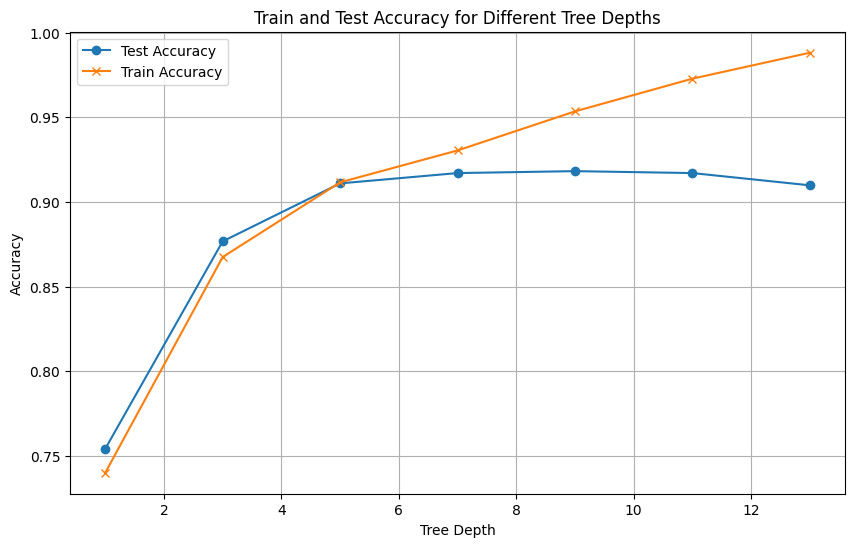

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X = df_encoded[specified_columns]
y = df_encoded['High Demand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'max_depth': list(range(1,15,2)),
    'criterion': ['entropy']
}

# Initialize the Decision Tree Classifier
tree_model_for_grid = DecisionTreeClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(tree_model_for_grid, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Conduct Grid Search
grid_search.fit(X_train, y_train)

# Record results
results = []
for i in range(len(grid_search.cv_results_['params'])):
    params = grid_search.cv_results_['params'][i]
    train_score = grid_search.cv_results_['mean_train_score'][i]
    test_score = grid_search.cv_results_['mean_test_score'][i]

    # Evaluate the model on the test set
    tree_model_for_grid.set_params(**params)
    tree_model_for_grid.fit(X_train, y_train)
    y_pred = tree_model_for_grid.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    results.append({
        'Depth': params['max_depth'],
        'Train Accuracy': train_score,
        'Validation Accuracy': test_score,
        'Test Accuracy': test_accuracy,
        'Test F1 Score': test_f1
    })

# Convert results to DataFrame and sort
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Depth', ascending=False).reset_index(drop=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(results_df['Depth'], results_df['Test Accuracy'], marker='o', label='Test Accuracy')
plt.plot(results_df['Depth'], results_df['Train Accuracy'], marker='x', label='Train Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for Different Tree Depths')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
print(results_df)

   Depth  Train Accuracy  Validation Accuracy  Test Accuracy  Test F1 Score
0     13        0.988136             0.905087       0.909817       0.909091
1     11        0.972806             0.905413       0.917047       0.916921
2      9        0.953482             0.906393       0.918189       0.917593
3      7        0.930406             0.908187       0.917047       0.916218
4      5        0.911570             0.898891       0.910959       0.909443
5      3        0.867458             0.862199       0.876712       0.877828
6      1        0.740052             0.732553       0.754186       0.783946


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X = df_encoded.drop(['High Demand', 'Rented Bike Count'], axis=1)
y = df_encoded['High Demand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Extract year, month, and day from the Date column for both training and test data
X_train['year'] = X_train['Date'].dt.year
X_train['month'] = X_train['Date'].dt.month
X_train['day'] = X_train['Date'].dt.day
X_train.drop('Date', axis=1, inplace=True)

X_test['year'] = X_test['Date'].dt.year
X_test['month'] = X_test['Date'].dt.month
X_test['day'] = X_test['Date'].dt.day
X_test.drop('Date', axis=1, inplace=True)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
y_train_pred = logistic_model.predict(X_train)

# Step 3: Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy: {training_accuracy}")

Training Accuracy: 0.815068493150685


In [33]:
print('Test Accuracy:',accuracy)
print('')
# For explanations of what precision/recall/f1 scores are
# https://www.v7labs.com/blog/f1-score-guide#:~:text=F1%20score%20is%20a%20machine%20learning%20evaluation%20metric%20that%20measures,prediction%20across%20the%20entire%20dataset.
print(classification_rep)

Test Accuracy: 0.8203957382039574

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1324
           1       0.83      0.80      0.82      1304

    accuracy                           0.82      2628
   macro avg       0.82      0.82      0.82      2628
weighted avg       0.82      0.82      0.82      2628



In [34]:
# Assuming you've already applied the same transformations to X_train and X_test
# The feature names should be taken from the transformed X_train
feature_names = X_train.columns

# Retrieve the coefficients from the logistic regression model
coefficients = logistic_model.coef_[0]

# Create a DataFrame to display the feature names and corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coefficients_df


Feature  Coefficient
0                        Hour     0.090657
1             Temperature(°C)     0.089985
2                 Humidity(%)    -0.057400
3            Wind speed (m/s)    -0.014205
4            Visibility (10m)    -0.000212
5   Dew point temperature(°C)     0.069112
6     Solar Radiation (MJ/m2)     0.047877
7                Rainfall(mm)    -0.084267
8               Snowfall (cm)    -0.011806
9              Seasons_Spring     0.033192
10             Seasons_Summer    -0.016578
11             Seasons_Winter    -0.056835
12         Holiday_No Holiday     0.012914
13        Functioning Day_Yes     0.042029
14                       year    -0.000062
15                      month     0.121779
16                        day     0.027537

In [35]:
from sklearn.feature_selection import SequentialFeatureSelector

# Initialize an empty list for selected features
selected_features = []

# Initialize a logistic regression model
logistic_model_forward = LogisticRegression()

# Perform forward selection using SequentialFeatureSelector
forward_selector = SequentialFeatureSelector(logistic_model_forward, direction='forward', n_features_to_select=None)
forward_selector.fit(X_train, y_train)

# Initialize an empty DataFrame to store the selected variables and their corresponding accuracies
forward_selection_df = pd.DataFrame(columns=['Selected_Variables', 'Accuracy'])

# Loop through the selected features to evaluate the model at each step
for i, selected in enumerate(forward_selector.get_support()):
    if selected:
        selected_features.append(X_train.columns[i])
        # Train the model on the selected features
        logistic_model_forward.fit(X_train[selected_features], y_train)

        # Make predictions and evaluate accuracy
        y_pred_forward = logistic_model_forward.predict(X_test[selected_features])
        accuracy_forward = accuracy_score(y_test, y_pred_forward)

        # Append the selected variables and their accuracy to the DataFrame
        forward_selection_df = forward_selection_df.append({'Selected_Variables': ', '.join(selected_features), 'Accuracy': accuracy_forward}, ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: Conv

In [36]:
forward_selection_df

Selected_Variables  Accuracy
0                                               Hour  0.643075
1                              Hour, Temperature(°C)  0.783486
2                 Hour, Temperature(°C), Humidity(%)  0.815830
3  Hour, Temperature(°C), Humidity(%), Solar Radi...  0.813927
4  Hour, Temperature(°C), Humidity(%), Solar Radi...  0.829909
5  Hour, Temperature(°C), Humidity(%), Solar Radi...  0.845510
6  Hour, Temperature(°C), Humidity(%), Solar Radi...  0.866058
7  Hour, Temperature(°C), Humidity(%), Solar Radi...  0.863014

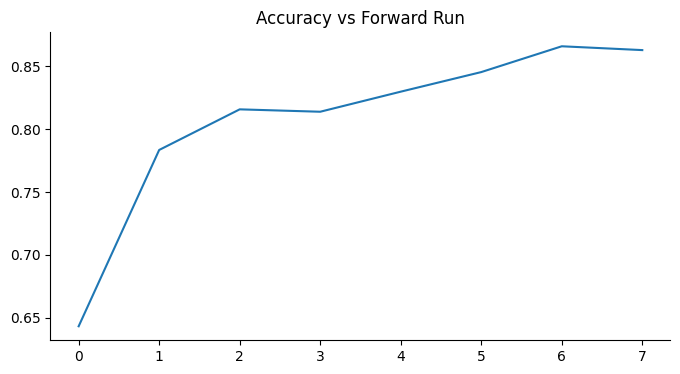

In [37]:
from matplotlib import pyplot as plt
forward_selection_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy vs Forward Run')
plt.gca().spines[['top', 'right']].set_visible(False)

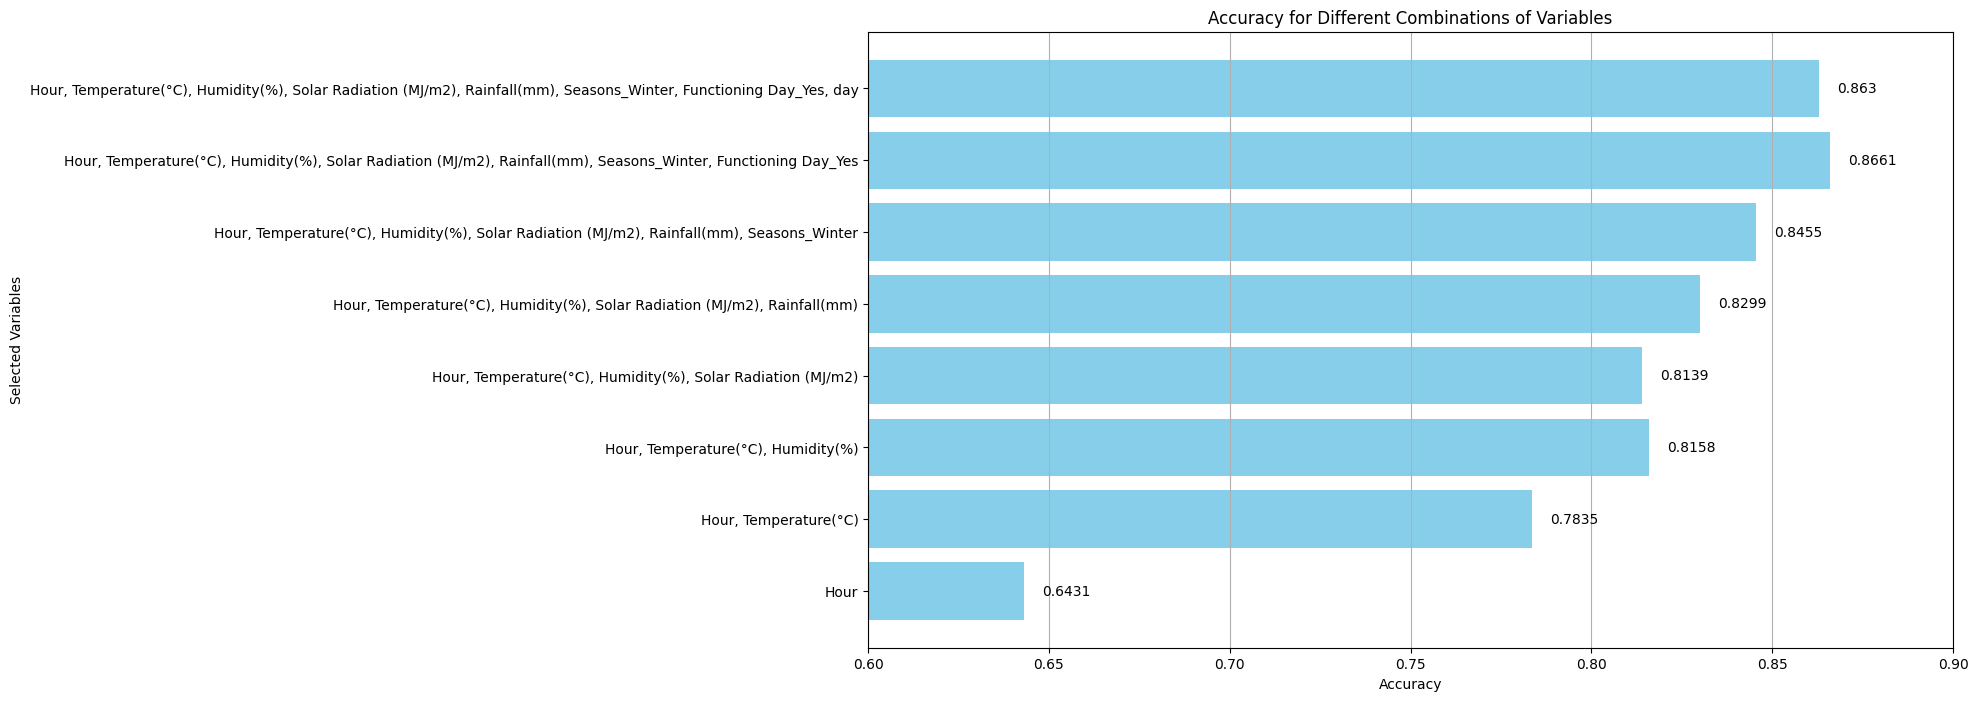

In [38]:
# Plotting
plt.figure(figsize=(14, 8))
plt.barh(forward_selection_df['Selected_Variables'], forward_selection_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Selected Variables')
plt.title('Accuracy for Different Combinations of Variables')
plt.xlim(.6, .90)
plt.grid(True, axis='x')

# Annotate the bars with the actual accuracy values
for i, v in enumerate(forward_selection_df['Accuracy']):
    plt.text(v + 0.005, i, str(round(v, 4)), va='center', color='black')

plt.show()


In [39]:
# Initialize a logistic regression model for backward selection
logistic_model_backward = LogisticRegression()

# Perform backward selection using SequentialFeatureSelector
backward_selector = SequentialFeatureSelector(logistic_model_backward, direction='backward', n_features_to_select=None)
backward_selector.fit(X_train, y_train)

# Initialize an empty DataFrame to store the selected variables and their corresponding accuracies
backward_selection_df = pd.DataFrame(columns=['Selected_Variables', 'Accuracy'])

# Start with all features from the transformed X_train
selected_features = list(X_train.columns)

# Loop through the selected features to evaluate the model at each step
for i, selected in enumerate(backward_selector.get_support()):
    if not selected:
        selected_features.remove(X_train.columns[i])
    # Train the model on the selected features
    logistic_model_backward.fit(X_train[selected_features], y_train)

    # Make predictions and evaluate accuracy
    y_pred_backward = logistic_model_backward.predict(X_test[selected_features])
    accuracy_backward = accuracy_score(y_test, y_pred_backward)

    # Append the selected variables and their accuracy to the DataFrame
    backward_selection_df = backward_selection_df.append({'Selected_Variables': ', '.join(selected_features), 'Accuracy': accuracy_backward}, ignore_index=True)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: Conv

In [ ]:
backward_selection_df


Selected_Variables  Accuracy
0   Hour, Temperature(°C), Humidity(%), Wind speed...  0.820396
1   Hour, Humidity(%), Wind speed (m/s), Visibilit...  0.824581
2   Hour, Humidity(%), Wind speed (m/s), Visibilit...  0.824581
3   Hour, Humidity(%), Visibility (10m), Dew point...  0.825723
4   Hour, Humidity(%), Dew point temperature(°C), ...  0.848174
5   Hour, Humidity(%), Solar Radiation (MJ/m2), Ra...  0.826484
6   Hour, Humidity(%), Solar Radiation (MJ/m2), Ra...  0.826484
7   Hour, Humidity(%), Solar Radiation (MJ/m2), Ra...  0.826484
8   Hour, Humidity(%), Solar Radiation (MJ/m2), Ra...  0.826484
9   Hour, Humidity(%), Solar Radiation (MJ/m2), Ra...  0.826484
10  Hour, Humidity(%), Solar Radiation (MJ/m2), Ra...  0.826484
11  Hour, Humidity(%), Solar Radiation (MJ/m2), Ra...  0.826484
12  Hour, Humidity(%), Solar Radiation (MJ/m2), Ra...  0.839802
13  Hour, Humidity(%), Solar Radiation (MJ/m2), Ra...  0.839802
14  Hour, Humidity(%), Solar Radiation (MJ/m2), Ra...  0.863014
15  Hour, Humidity(%), Solar Radiation (MJ/m2), Ra...  0.863014
16  Hour, Humidity(%), Solar Radiation (MJ/m2), Ra...  0.862253

from matplotlib import pyplot as plt
backward_selection_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
backward_selection_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

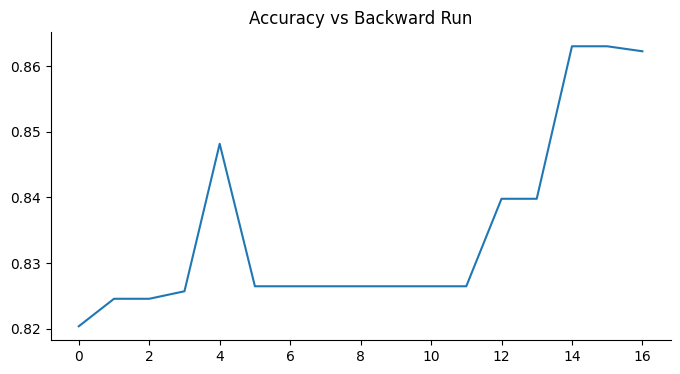

In [ ]:
from matplotlib import pyplot as plt
backward_selection_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy vs Backward Run')
plt.gca().spines[['top', 'right']].set_visible(False)

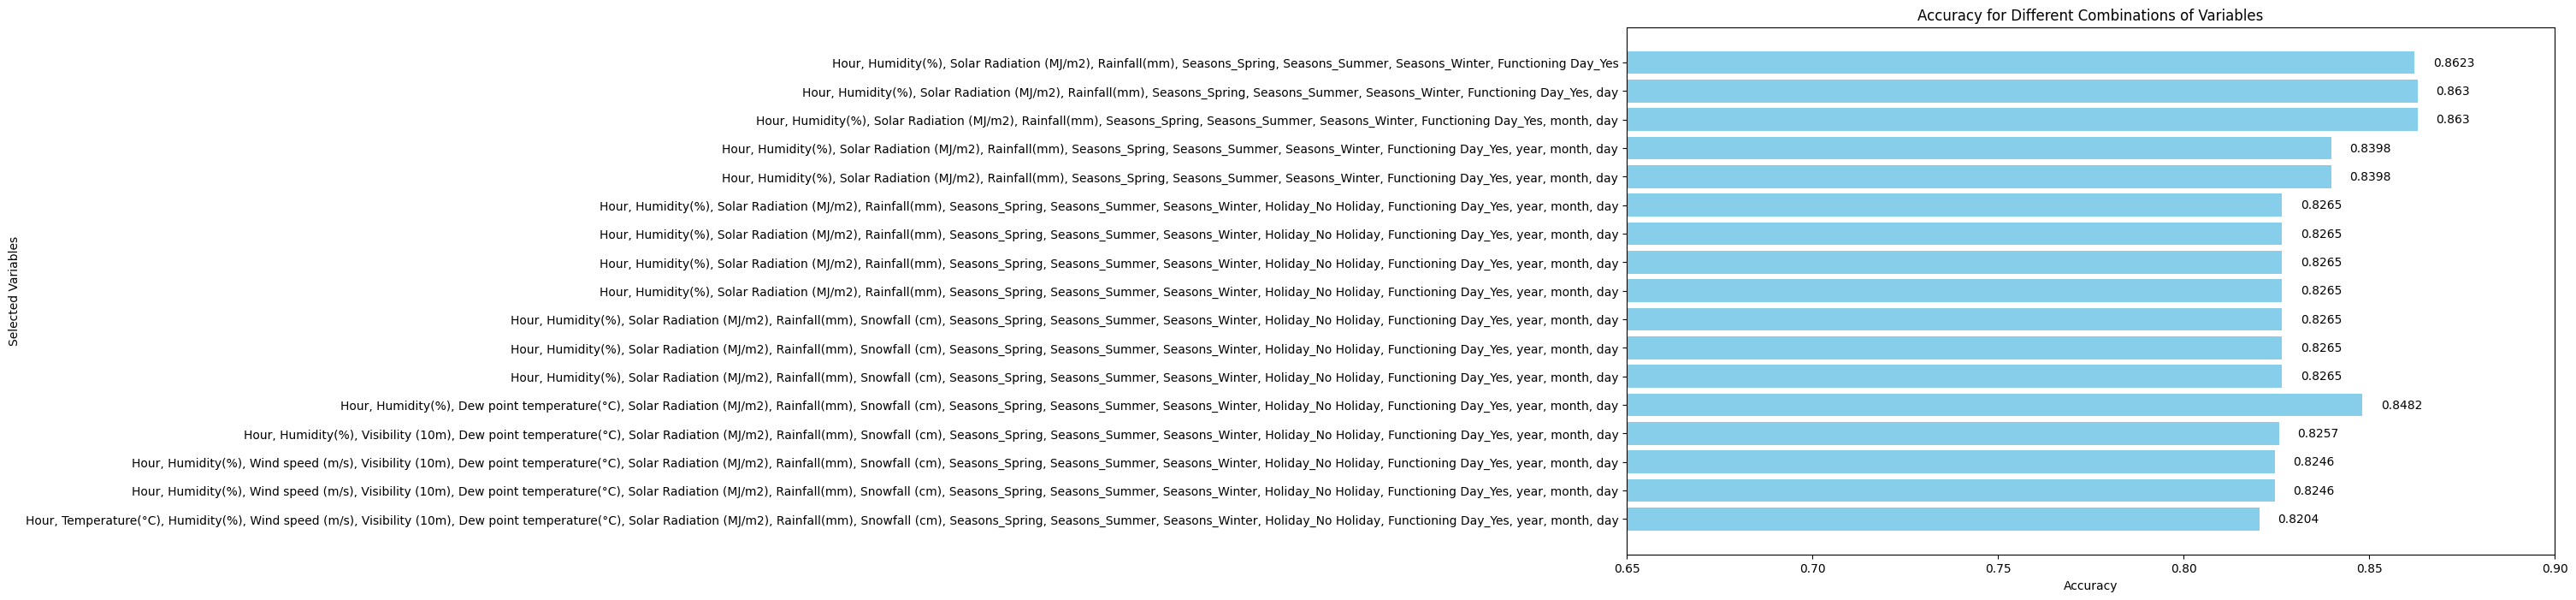

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14, 8))
plt.barh(backward_selection_df.index, backward_selection_df['Accuracy'], color='skyblue')
plt.yticks(backward_selection_df.index, backward_selection_df['Selected_Variables'])
plt.xlabel('Accuracy')
plt.ylabel('Selected Variables')

plt.title('Accuracy for Different Combinations of Variables')
plt.xlim(.65, .90)

for i, v in enumerate(backward_selection_df['Accuracy']):
    plt.text(v + 0.005, i, str(round(v, 4)), va='center', color='black')

plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

selected = ['Hour', 'Humidity(%)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Functioning Day_Yes']

# Split the data into training and testing sets
X = df_encoded[selected]
y = df_encoded['High Demand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1324
           1       0.88      0.84      0.86      1304

    accuracy                           0.86      2628
   macro avg       0.86      0.86      0.86      2628
weighted avg       0.86      0.86      0.86      2628



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
# Training the SVM model
svm_model = SVR()
svm_model.fit(X_train_specified, y_train_specified)

# Predicting and evaluating the model
y_pred = svm_model.predict(X_test_specified)
mse = mean_squared_error(y_test_specified, y_pred)
rmse = np.sqrt(mse)

rmse

0.3795904183225512

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Initialize and train the SVM model and a polynomial kernel
svm_model_poly = SVC(C=1.0, kernel='poly')
svm_model_poly.fit(X_train_specified, y_train_specified)

# Predictions and evaluation
y_pred_train_poly = svm_model_poly.predict(X_train_specified)
y_pred_test_poly = svm_model_poly.predict(X_test_specified)

train_accuracy_poly = accuracy_score(y_train_specified, y_pred_train_poly)
test_accuracy_poly = accuracy_score(y_test_specified, y_pred_test_poly)

train_accuracy_poly, test_accuracy_poly

(0.701912100456621, 0.7157534246575342)

In [ ]:
from sklearn.metrics import f1_score, classification_report

# Compute F1-scores for the polynomial kernel model
f1_train_poly = f1_score(y_train_specified, y_pred_train_poly, average=None)
f1_test_poly = f1_score(y_test_specified, y_pred_test_poly, average=None)

# Generate a classification report for test data
classification_rep_poly = classification_report(y_test_specified, y_pred_test_poly)

# f1_train_poly, f1_test_poly,

print(classification_rep_poly)

              precision    recall  f1-score   support

           0       0.67      0.88      0.76       885
           1       0.82      0.55      0.66       867

    accuracy                           0.72      1752
   macro avg       0.74      0.71      0.71      1752
weighted avg       0.74      0.72      0.71      1752



### INTERPRETATION

**Train Accuracy -** It indicates that the model correctly predicts the outcome approximately 70% of the time when applied to the data it was trained on. This suggests that the model has a fair understanding of the underlying patterns in the training data.<br>

**Test Accuracy -** A test accuracy slightly higher than the training accuracy is a good sign, indicating that the model is not overfitting and is generalizing well to new data. However, the accuracy itself is still moderate. <br>

- The SVM model shows a moderate level of performance in both training and testing, with a slight improvement in test accuracy, which is a positive indication of its generalizability.<br>
- The model performs better in identifying class 0 instances (higher recall) but struggles somewhat with class 1 (lower recall).<br>
- Precision is higher for class 1, indicating fewer false positives for this class.<br>
- There is a trade-off in the model between precision and recall, particularly for class 1.<br>
- The overall F1 scores suggest that the model is more effective in predicting class 0 than class 1.<br>

In [ ]:
import numpy as np

# Define the range of C values to be tested
C_values = [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 250, 500, 1000]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
f1_scores_class1 = []

# Loop over each value of C to train the SVM model and evaluate performance
for C in C_values:
    svm_model_loop = SVC(C=C, kernel='poly')
    svm_model_loop.fit(X_train_specified, y_train_specified)

    # Predictions and evaluation
    y_pred_train_loop = svm_model_loop.predict(X_train_specified)
    y_pred_test_loop = svm_model_loop.predict(X_test_specified)

    train_accuracies.append(accuracy_score(y_train_specified, y_pred_train_loop))
    test_accuracies.append(accuracy_score(y_test_specified, y_pred_test_loop))
    f1_scores_class1.append(f1_score(y_test_specified, y_pred_test_loop, pos_label=1))

# Compile results into a DataFrame for better visualization
results_df = pd.DataFrame({
    'C_value': C_values,
    'Train_Accuracy': train_accuracies,
    'Test_Accuracy': test_accuracies,
    'F1_Score_Class1': f1_scores_class1
})

results_df

C_value  Train_Accuracy  Test_Accuracy  F1_Score_Class1
0       0.1        0.581050       0.581621         0.579461
1       0.5        0.690782       0.705479         0.642659
2       1.0        0.701912       0.715753         0.656077
3       2.0        0.715325       0.722032         0.662509
4       3.0        0.722175       0.728311         0.671724
5       4.0        0.725029       0.732877         0.678571
6       5.0        0.729737       0.736301         0.683995
7       6.0        0.733019       0.743151         0.693042
8       7.0        0.736159       0.747146         0.698434
9       8.0        0.737728       0.750571         0.702923
10      9.0        0.740297       0.754566         0.708672
11     10.0        0.743151       0.756849         0.711773
12     50.0        0.762414       0.783105         0.749009
13    100.0        0.771547       0.787671         0.756545
14    250.0        0.780965       0.795662         0.768435
15    500.0        0.785674       0.799087         0.772610
16   1000.0        0.789669       0.807078         0.783333

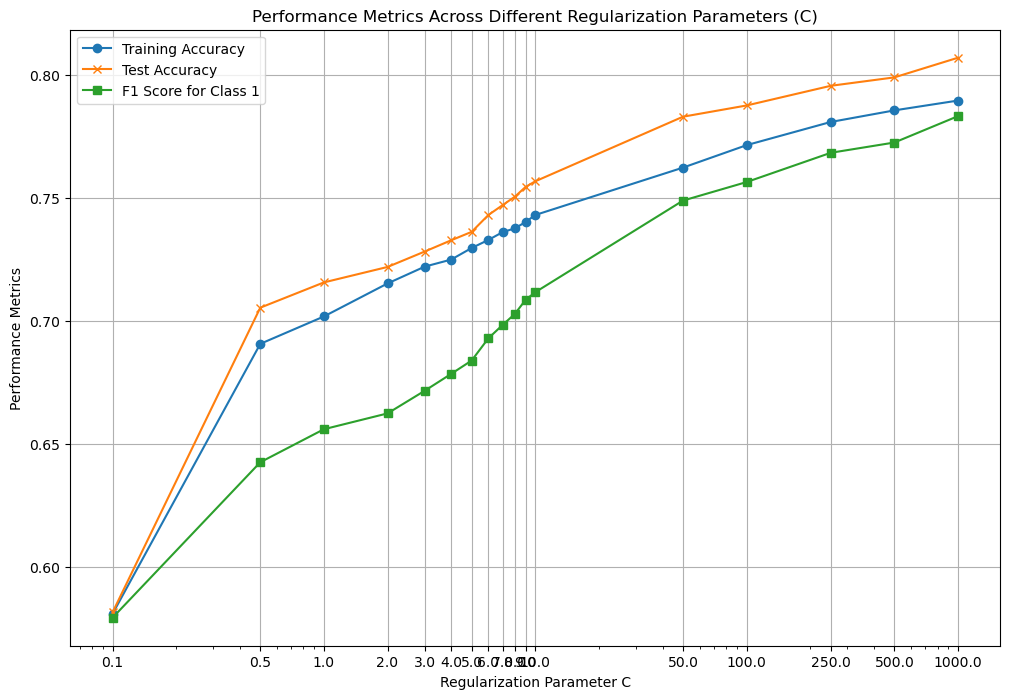

In [ ]:
import matplotlib.pyplot as plt

# Initialize the plot
plt.figure(figsize=(12, 8))

# Plotting the metrics
plt.plot(results_df['C_value'], results_df['Train_Accuracy'], marker='o', label='Training Accuracy')
plt.plot(results_df['C_value'], results_df['Test_Accuracy'], marker='x', label='Test Accuracy')
plt.plot(results_df['C_value'], results_df['F1_Score_Class1'], marker='s', label='F1 Score for Class 1')

# Annotate the plot
plt.xlabel('Regularization Parameter C')
plt.ylabel('Performance Metrics')
plt.title('Performance Metrics Across Different Regularization Parameters (C)')
plt.xscale('log')
plt.xticks(results_df['C_value'], labels=results_df['C_value'])
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

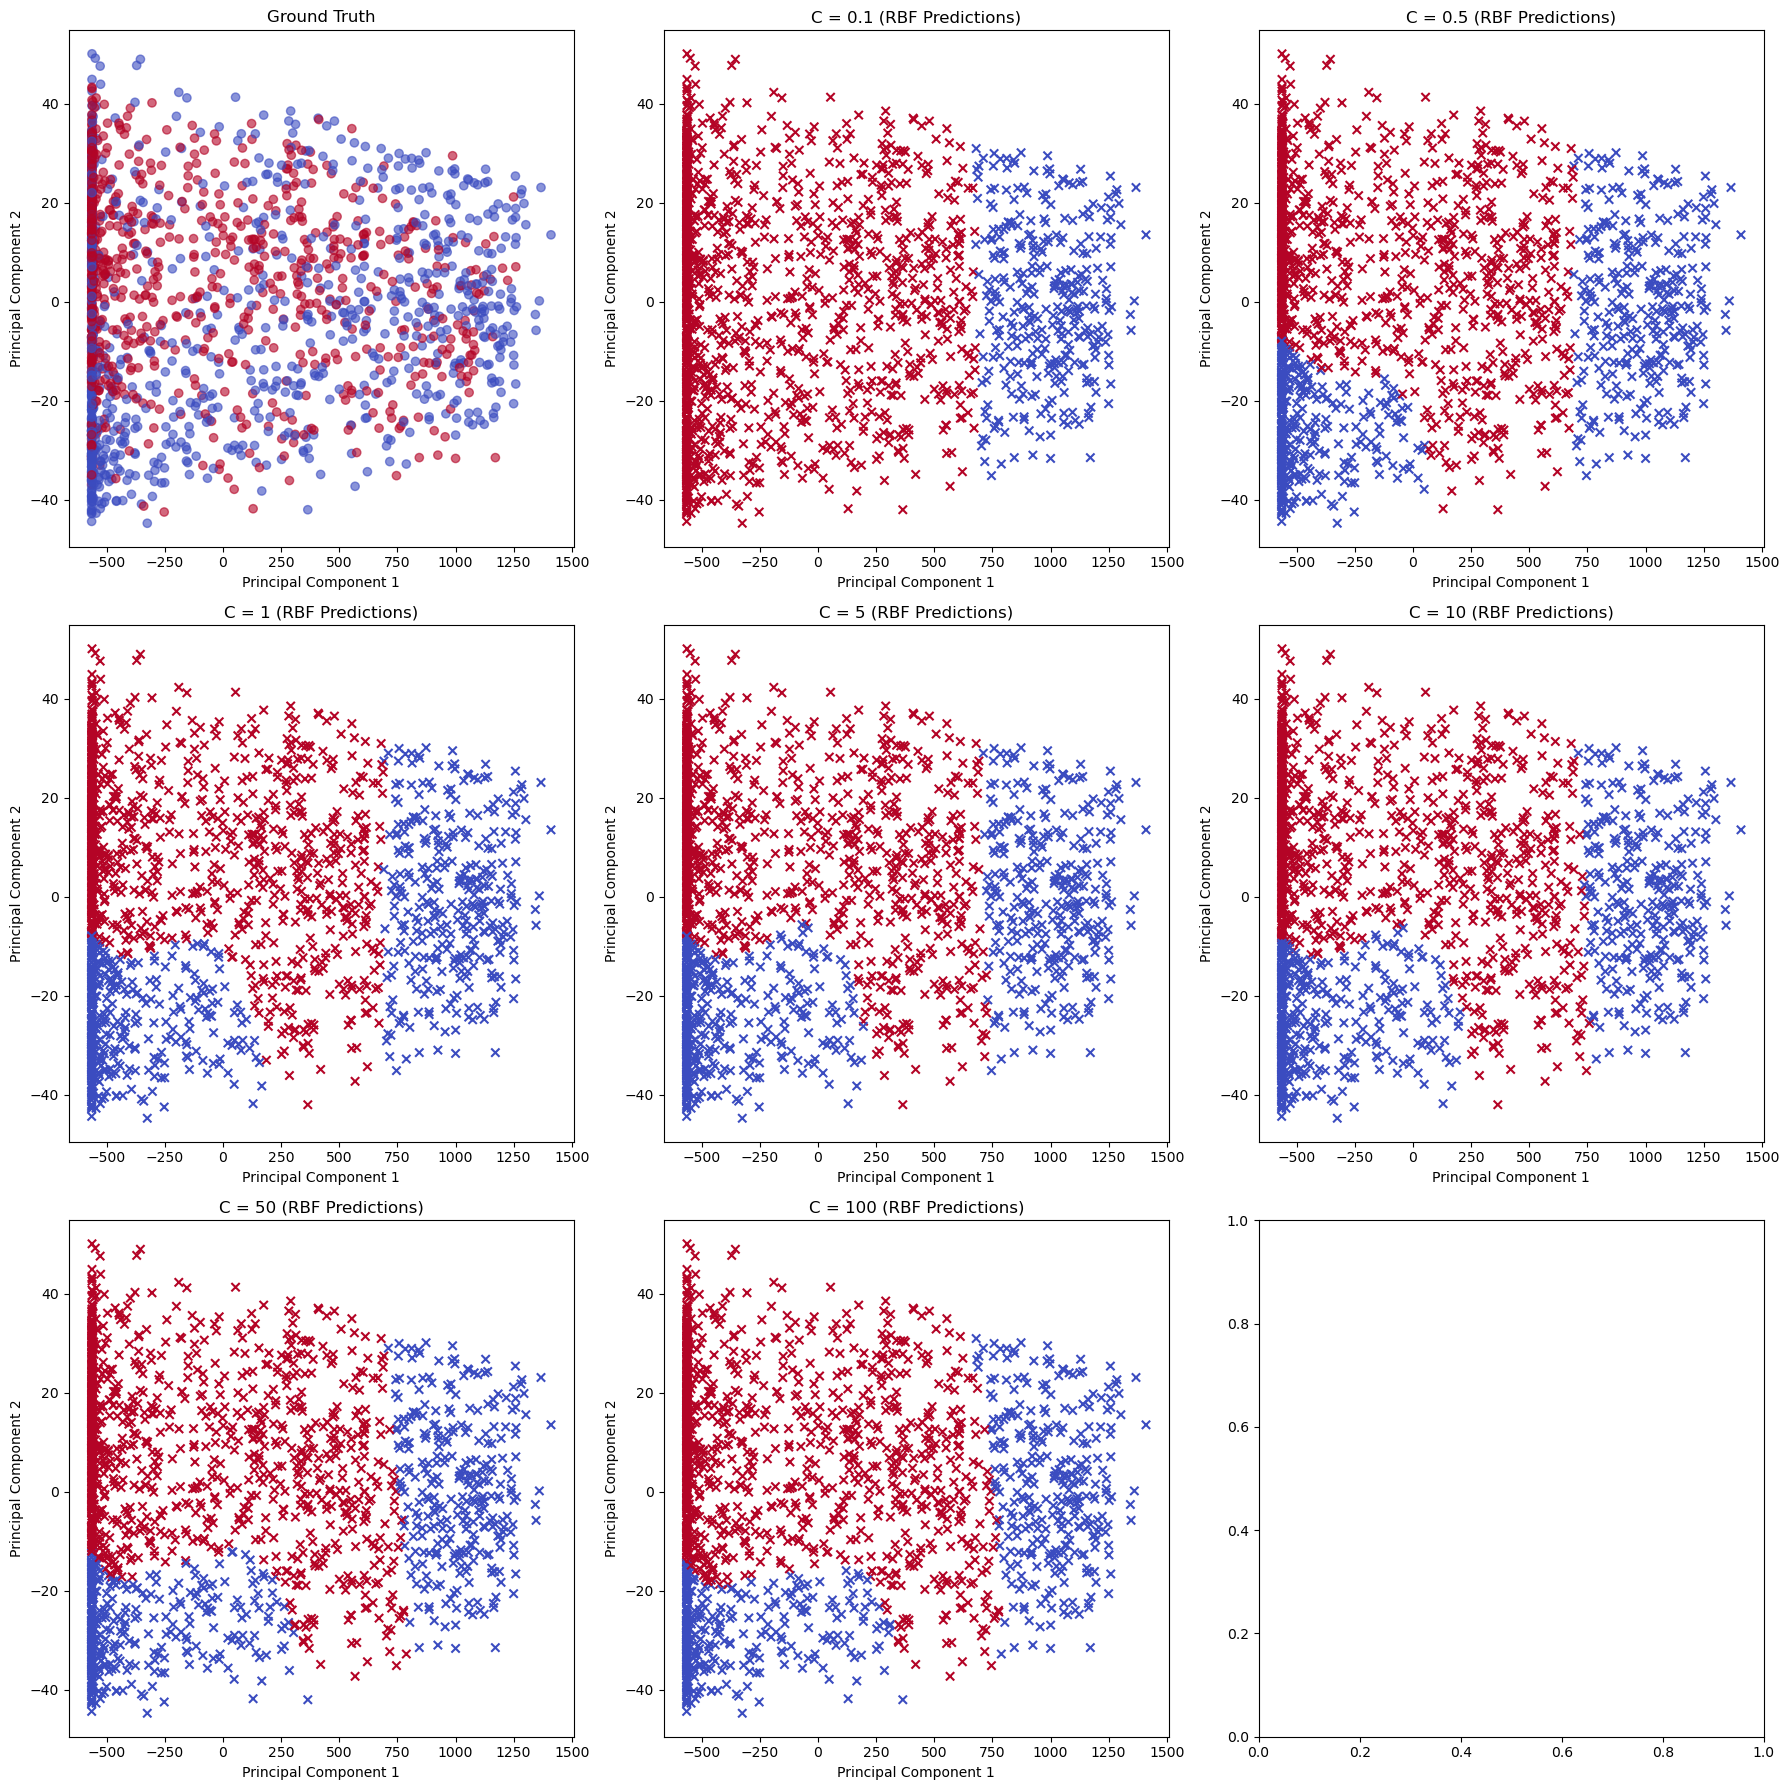

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_specified)
X_test_pca = pca.transform(X_test_specified)

# Initialize the plot with 8 subplots (1 for ground truth + 7 for different C-values)
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Scatter plot for the ground truth in the first subplot
ax = axes.flatten()[0]
ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_specified, cmap='coolwarm', marker='o', alpha=0.6)
ax.set_title('Ground Truth')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Loop over selected values of C and plot the predictions in remaining subplots
for i, C in enumerate([0.1, 0.5, 1, 5, 10, 50, 100], start=1):
    # Initialize and train the SVM model with C and RBF kernel on PCA-transformed data
    svm_model_pca_rbf = SVC(C=C, kernel='rbf')
    svm_model_pca_rbf.fit(X_train_pca, y_train_specified)

    # Predictions on the test set
    y_pred_pca_rbf = svm_model_pca_rbf.predict(X_test_pca)

    # Determine the axis for this subplot
    ax = axes.flatten()[i]

    # Scatter plot for the predictions
    ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_pca_rbf, cmap='coolwarm', marker='x')

    # Titles and labels
    ax.set_title(f'C = {C} (RBF Predictions)')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')

# Remove unused subplots
for i in range(len(C_values) + 1, 9):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

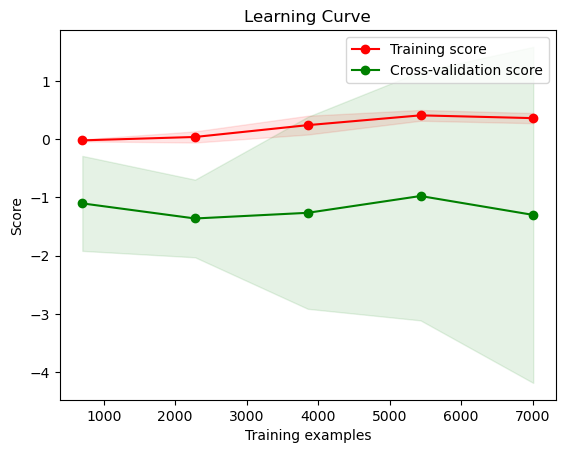

In [ ]:
from sklearn.model_selection import learning_curve
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(svm_model, X_specified, y_specified, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

## SVM: HyperParameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
param_grid_svm_reduced = {
    'C': [1, 10],  # Fewer options for the regularization parameter
    'gamma': ['scale'],  # Only 'scale' for the kernel coefficient
    'kernel': ['rbf']  # Only the 'rbf' kernel
}

grid_search_svm_reduced = GridSearchCV(SVC(random_state=42), param_grid_svm_reduced, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_svm_reduced.fit(X_train_specified, y_train_specified)

# Best hyperparameters with reduced grid
best_params_svm_reduced = grid_search_svm_reduced.best_params_
print('Best Hyperparameters for SVM (Reduced Grid):', best_params_svm_reduced)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Hyperparameters for SVM (Reduced Grid): {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
from sklearn.metrics import accuracy_score

# Predicting on training data using the best estimator found by GridSearchCV
train_predictions = grid_search_svm_reduced.best_estimator_.predict(X_train_specified)
train_accuracy = accuracy_score(y_train_specified, train_predictions)
print("Training Accuracy:", train_accuracy)

# Assuming you have your test data ready as X_test_specified, y_test_specified
test_predictions = grid_search_svm_reduced.best_estimator_.predict(X_test_specified)
test_accuracy = accuracy_score(y_test_specified, test_predictions)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.8095034246575342
Test Accuracy: 0.8202054794520548


#Neural Nets

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming X_train_specified, X_test_specified, y_train_specified, and y_test_specified are already defined.

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_specified)
X_test_scaled = scaler.transform(X_test_specified)

# Define and train the MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train_specified)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test_specified, y_pred)
print(f'Accuracy on Test Set: {accuracy:.2f}')

# Display classification report
print("Classification Report:\n", classification_report(y_test_specified, y_pred))

Accuracy on Test Set: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       885
           1       0.94      0.92      0.93       867

    accuracy                           0.93      1752
   macro avg       0.93      0.93      0.93      1752
weighted avg       0.93      0.93      0.93      1752



#Neural Nets with Hyperparameter Tuning

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform

# Assuming X_train_specified, X_test_specified, y_train_specified, and y_test_specified are already defined.

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_specified)
X_test_scaled = scaler.transform(X_test_specified)

# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'hidden_layer_sizes': [(64, 32), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'max_iter': randint(500, 1500),
    'alpha': uniform(0.0001, 0.01)
}

# Create the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train_scaled, y_train_specified)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test_specified, y_pred)
print(f'Accuracy on Test Set: {accuracy:.2f}')

# Display classification report
print("Classification Report:\n", classification_report(y_test_specified, y_pred))



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.006086584841970367, 'hidden_layer_sizes': (64, 32), 'max_iter': 621}
Accuracy on Test Set: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       885
           1       0.94      0.93      0.93       867

    accuracy                           0.93      1752
   macro avg       0.93      0.93      0.93      1752
weighted avg       0.93      0.93      0.93      1752



# Naive Bayes<a class = "anchor" id = "NB"></a>

Here we are going to run Naive Bayes. Given evidence from our dataset, we can use it to classify if we have high or low demand and it will report the probability associated with its classification.

[go back to top^](#outline)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train_specified, y_train_specified)

# Now for accurcy
from sklearn.metrics import (
    accuracy_score,
    f1_score,
)

y_pred = model.predict(X_test_specified)
accuray = accuracy_score(y_pred, y_test_specified)
f1 = f1_score(y_pred, y_test_specified, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7785388127853882
F1 Score: 0.7854416503783744


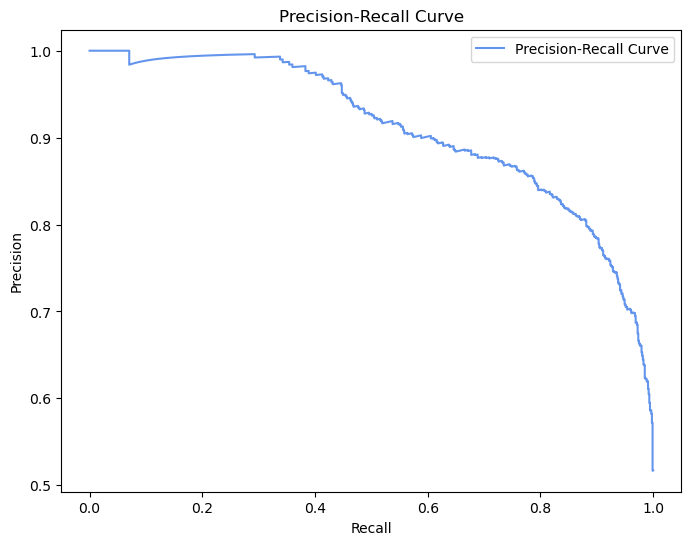

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test_specified)[:, 1]
precision, recall, _ = precision_recall_curve(y_test_specified, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='cornflowerblue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_specified, y_train_specified)

# Making predictions
y_train_pred = rf_classifier.predict(X_train_specified)
y_test_pred = rf_classifier.predict(X_test_specified)

# Evaluating the model
metrics = {
    "Train Accuracy": accuracy_score(y_train_specified, y_train_pred),
    "Test Accuracy": accuracy_score(y_test_specified, y_test_pred),
    "Precision": precision_score(y_test_specified, y_test_pred),
    "Recall": recall_score(y_test_specified, y_test_pred),
    "F1 Score": f1_score(y_test_specified, y_test_pred),
    "Confusion Matrix": confusion_matrix(y_test_specified, y_test_pred)
}

metrics


{'Train Accuracy': 1.0,
 'Test Accuracy': 0.934931506849315,
 'Precision': 0.9445100354191264,
 'Recall': 0.922722029988466,
 'F1 Score': 0.9334889148191365,
 'Confusion Matrix': array([[838,  47],
        [ 67, 800]])}

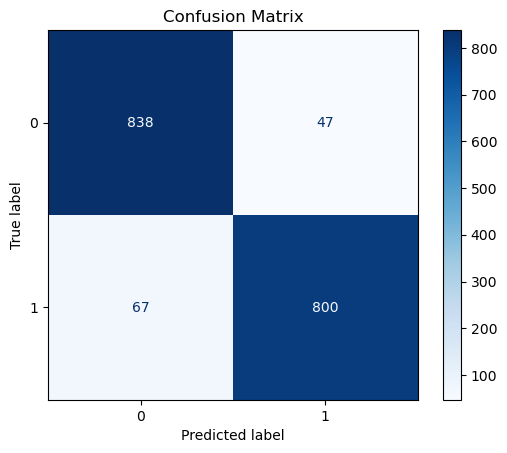

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming rf_classifier is your trained Random Forest model
# and X_test, y_test are your test data and labels

# Predicting the test set results
y_pred = rf_classifier.predict(X_test_specified)

# Generating the confusion matrix
cm = confusion_matrix(y_test_specified, y_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### INTERPRETATION

The perfect accuracy on the training set suggests that the model might be overfitting. The precision of 94.33% and recall of 92.04% demonstrate that the model is not only accurate in predicting high-demand instances (precision) but is also effective in capturing the majority of these high-demand instances (recall). The F1 score of 93.17%, which indicated the balance between precision and recall.<br>


**CONFUSION MATRIX:**<br>

- **True Negative (TN): 837 -** Times when the model correctly predicted low demand for bikes. This indicates good model reliability in situations where the demand is genuinely low, helping in avoiding unnecessary resource allocation, such as not deploying excess bikes or staff.<br>
- **False Positive (FP): 48 -** Times when the model incorrectly predicted high demand (but actually, it was low). This might lead to unnecessary resource allocation.<br>
- **False Negative (FN): 69 -** Times when the model missed predicting high demand. This could result in inadequate service during peak times.<br>
- **True Positive (TP): 798 -** Times when the model correctly predicted high demand for bikes. This indicates that the model is effectively identifying periods of high demand, allowing for appropriate resource allocation to meet the customer needs.<br>

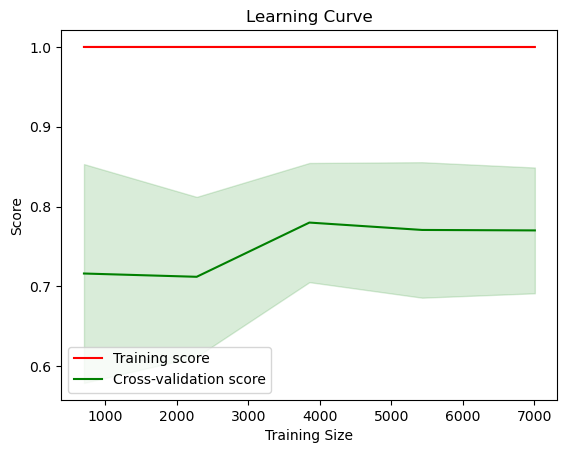

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve


#Learning Curve
train_sizes, train_scores, test_scores = learning_curve(rf_classifier, X_specified, y_specified, n_jobs=-1, cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 5),
                                                        verbose=0)

# Mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, label='Training score', color='r')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='g')

# Draw bands (fill_between)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.15)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.15)

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

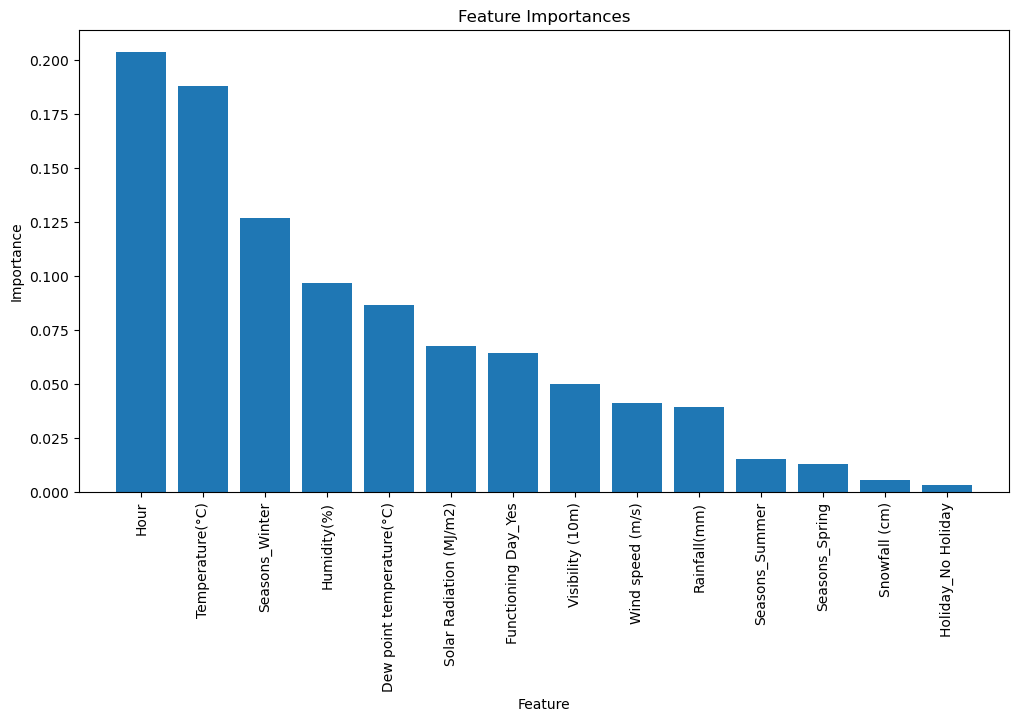

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the random forest model
importances = rf_classifier.feature_importances_

# Get the indices of the sorted feature importances
indices = np.argsort(importances)[::-1]

# Arrange the feature names in the order of importance
feature_names = [X_train_specified.columns[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_specified.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_specified.shape[1]), feature_names, rotation=90)
plt.xlim([-1, X_train_specified.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


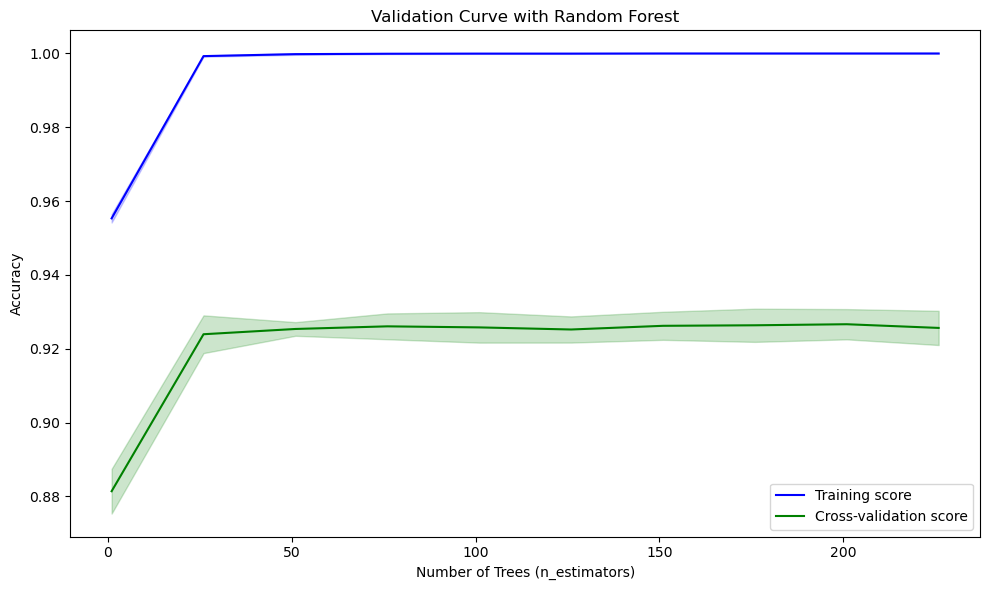

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train_specified, y_train_specified, X_test_specified, y_test_specified are already defined

# Create a Random Forest Classifier with random state for reproducibility
rf_classifier = RandomForestClassifier(random_state=42)

# Choose a range of hyperparameter values for the validation curve (example with 'n_estimators')
param_range = np.arange(1, 250, 25)

# Calculate the scores for the training and test sets over the range of parameter values
train_scores, test_scores = validation_curve(
    rf_classifier, X_train_specified, y_train_specified,
    param_name="n_estimators",
    param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.subplots(1, 1, figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training score", color="b")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)

plt.plot(param_range, test_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

plt.title("Validation Curve with Random Forest")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()


## Random Forest: HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [10, 20, 30, None],   # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]         # Method of selecting samples for training each tree
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_specified, y_train_specified)

# Best parameters found
best_params = grid_search.best_params_

# Print the best parameters
print("**Best parameters found:** ", best_params)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_spli

/Users/aparnanair/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
344 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aparnanair/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aparnanair/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/aparnanair/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_cons

**Best parameters found:**  {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**Best parameters found:  {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}**

In [ ]:
from sklearn.metrics import accuracy_score

# Fit the grid search to the data (You already have this in your code)
grid_search.fit(X_train_specified, y_train_specified)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Predict on the training data
y_train_pred = best_rf.predict(X_train_specified)
train_accuracy = accuracy_score(y_train_specified, y_train_pred)
print('Training Accuracy:', train_accuracy)

# Predict on the test data (assuming you have X_test_specified and y_test_specified)
y_test_pred = best_rf.predict(X_test_specified)
test_accuracy = accuracy_score(y_test_specified, y_test_pred)
print('Test Accuracy:', test_accuracy)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=

/Users/aparnanair/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
347 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aparnanair/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aparnanair/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/aparnanair/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_cons

Training Accuracy: 1.0
Test Accuracy: 0.934931506849315


#--------------------------

#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Fitting the model to the training data
gb_model.fit(X_train_specified, y_train_specified)

# Making predictions on the test set
y_pred = gb_model.predict(X_test_specified)

# Evaluating the model
accuracy = accuracy_score(y_test_specified, y_pred)
f1 = f1_score(y_test_specified, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.93
F1 Score: 0.93


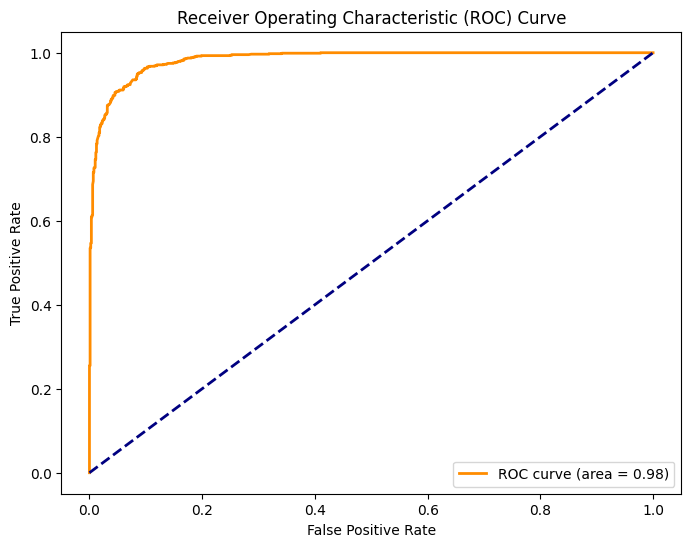

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have binary classification (adjust as needed)
fpr, tpr, _ = roc_curve(y_test_specified, gb_model.predict_proba(X_test_specified)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#Gradient Boosting with HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns


#Gradient Boosting Classifier with Hyperparameter Tuning
gb_model_ht = GradientBoostingClassifier(random_state=42)

#Defining the hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

#GridSearchCV
grid_search_gb = GridSearchCV(gb_model_ht, param_grid, cv=5, scoring='accuracy')

# Fitting the model to the training data with hyperparameter tuning
grid_search_gb.fit(X_train_specified, y_train_specified)

#hyperparameters
best_params = grid_search_gb.best_params_
print(f'Best Hyperparameters for Gradient Boosting: {best_params}')

# Making predictions on the test dataset
y_pred_gb_ht = grid_search_gb.predict(X_test_specified)

# Evaluating the model with the hyperparameters
accuracy_gb_ht = accuracy_score(y_test_specified, y_pred_gb_ht)
print(f'Accuracy with Best Hyperparameters for Gradient Boosting: {accuracy_gb_ht:.2f}')

results_df = pd.DataFrame(grid_search_gb.cv_results_)


Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
Accuracy with Best Hyperparameters for Gradient Boosting: 0.94


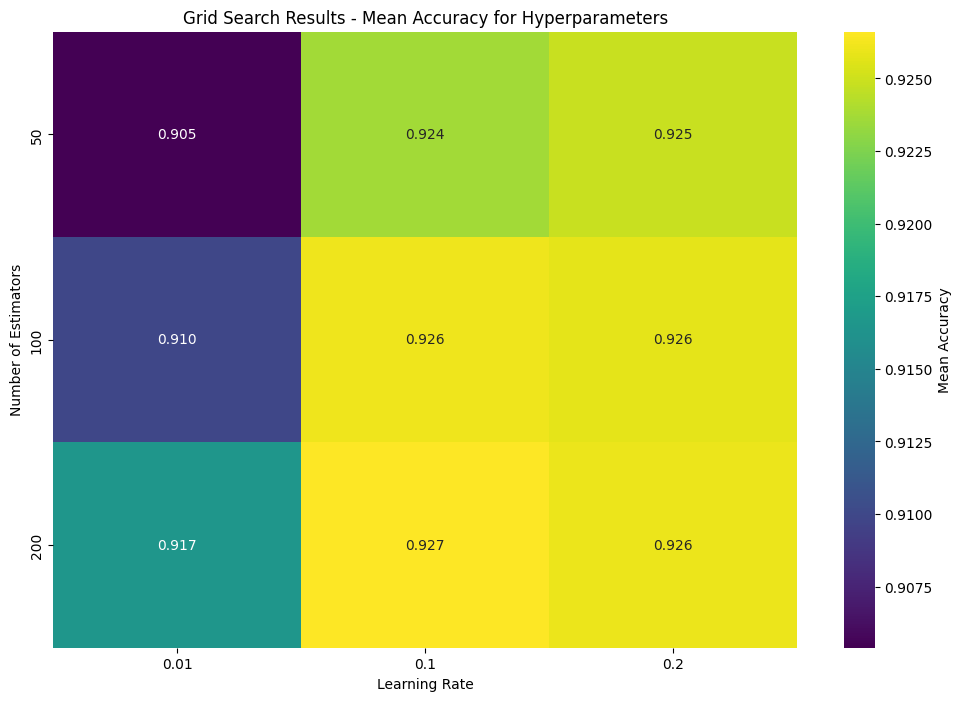

In [ ]:
#combinations of learning rates and the number of estimators perform well.
# Plotting heatmap for performance (accuracy) across hyperparameter combinations
plt.figure(figsize=(12, 8))
heatmap_data = results_df.pivot_table(index='param_n_estimators', columns='param_learning_rate', values='mean_test_score', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".3f", cbar_kws={'label': 'Mean Accuracy'})
plt.title('Grid Search Results - Mean Accuracy for Hyperparameters')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Estimators')
plt.show()



#XGBoost with HyperParameter Tuning

In [ ]:
import xgboost as xgb

#XGBoost Classifier with Hyperparameter Tuning
xgb_model_ht = xgb.XGBClassifier(random_state=42)

# Defining the hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

#GridSearchCV
grid_search_xgb = GridSearchCV(xgb_model_ht, param_grid, cv=5, scoring='accuracy')

# Fitting the model to the training data with hyperparameter tuning
grid_search_xgb.fit(X_train_specified, y_train_specified)

#hyperparameters
best_params_xgb = grid_search_xgb.best_params_
print(f'Best Hyperparameters for XGBoost: {best_params_xgb}')

# Making predictions on the test dataset
y_pred_xgb_ht = grid_search_xgb.predict(X_test_specified)

# Evaluating the model with the hyperparameters
accuracy_xgb_ht = accuracy_score(y_test_specified, y_pred_xgb_ht)
print(f'Accuracy with Best Hyperparameters for XGBoost: {accuracy_xgb_ht:.2f}')


Best Hyperparameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}
Accuracy with Best Hyperparameters for XGBoost: 0.94


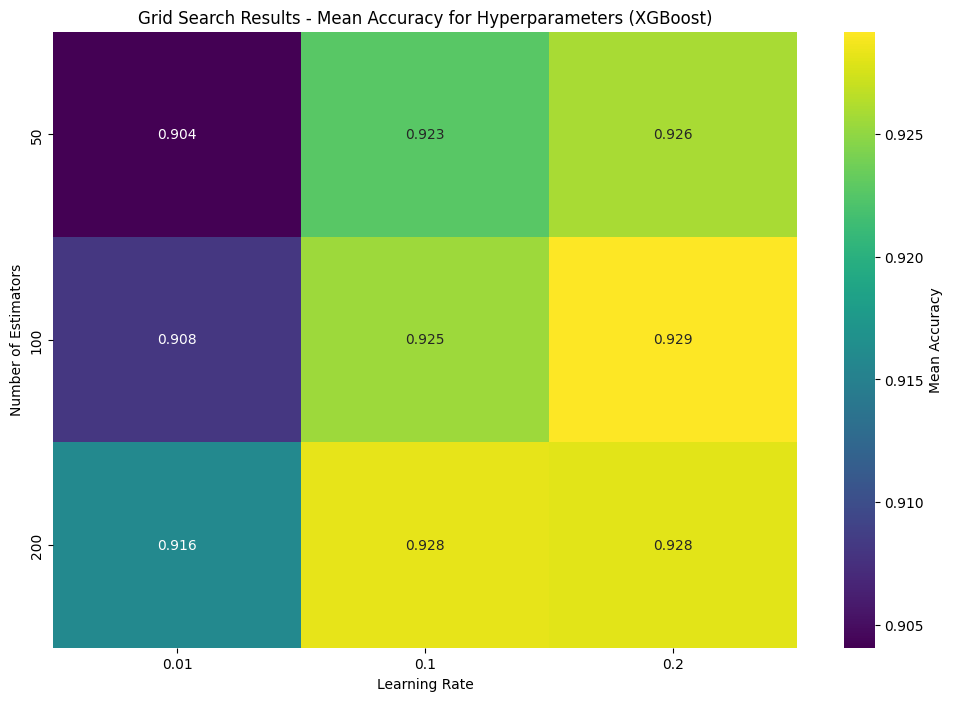

In [ ]:
results_df_xgb = pd.DataFrame(grid_search_xgb.cv_results_)

# Plotting heatmap for performance (accuracy) across hyperparameter combinations
plt.figure(figsize=(12, 8))
heatmap_data_xgb = results_df_xgb.pivot_table(index='param_n_estimators', columns='param_learning_rate', values='mean_test_score', aggfunc='mean')
sns.heatmap(heatmap_data_xgb, annot=True, cmap='viridis', fmt=".3f", cbar_kws={'label': 'Mean Accuracy'})
plt.title('Grid Search Results - Mean Accuracy for Hyperparameters (XGBoost)')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Estimators')
plt.show()


# KNN<a class = "anchor" id = "KNN"></a>

Now we run our K-Nearest Neighbors on our data! This will help us predict if there is high or low bike demand at that hour based on if "other" similar instances had high or low demand.

[go back to top^](#outline)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# Drop the 'ID' column

# Separate features and target
X =  df_encoded[specified_columns] # Features
y = df_encoded['High Demand']  # Target

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Splitting the dataset into the Training set and Test set
X_trainKNN, X_testKNN, y_trainKNN, y_testKNN = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit and transform the training data
X_trainKNN = scaler.fit_transform(X_trainKNN)

# Transform the testing data
X_testKNN = scaler.transform(X_testKNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier to the data
knn.fit(X_trainKNN, y_trainKNN)

from sklearn.metrics import classification_report, accuracy_score

# Predicting the Test set results
y_predKNN = knn.predict(X_testKNN)

# Evaluating the Algorithm
print(accuracy_score(y_testKNN, y_predKNN))
print(classification_report(y_testKNN, y_predKNN))

0.8858447488584474
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       885
           1       0.89      0.88      0.88       867

    accuracy                           0.89      1752
   macro avg       0.89      0.89      0.89      1752
weighted avg       0.89      0.89      0.89      1752



/Users/ivangonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predicting the Test set results
y_predKNN = knn.predict(X_testKNN)

# Calculating the Accuracy
accuracyKNN = accuracy_score(y_testKNN, y_predKNN)
print(f'Accuracy: {accuracyKNN:.2f}')

# Generating the Confusion Matrix
conf_matrixKNN = confusion_matrix(y_testKNN, y_predKNN)
print("Confusion Matrix:")
print(conf_matrixKNN)

# Generating the Classification Report
class_reportKNN = classification_report(y_testKNN, y_predKNN)
print("Classification Report:")
print(class_reportKNN)


Accuracy: 0.89
Confusion Matrix:
[[792  93]
 [107 760]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       885
           1       0.89      0.88      0.88       867

    accuracy                           0.89      1752
   macro avg       0.89      0.89      0.89      1752
weighted avg       0.89      0.89      0.89      1752



/Users/ivangonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Hyperparameter Tuning

When running our KNN with the number of neighbors set to 1, we end up getting a model with an accuracy of 89%. Now that we have run the model once, lets do some hyperparameter tunning to find the most optimal number of neighbors to improve our model. We will do this my looping k from 1 to 9 and recording the accurcy, precision, recall, and f1 score.

/Users/ivangonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/var/folders/fg/x6p5mnqd6c91vsl75k54d5h40000gn/T/ipykernel_9018/2820856462.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'k': k, 'Accuracy': accuracyKNN, 'Precision': precisionKNN,
/Users/ivangonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike 

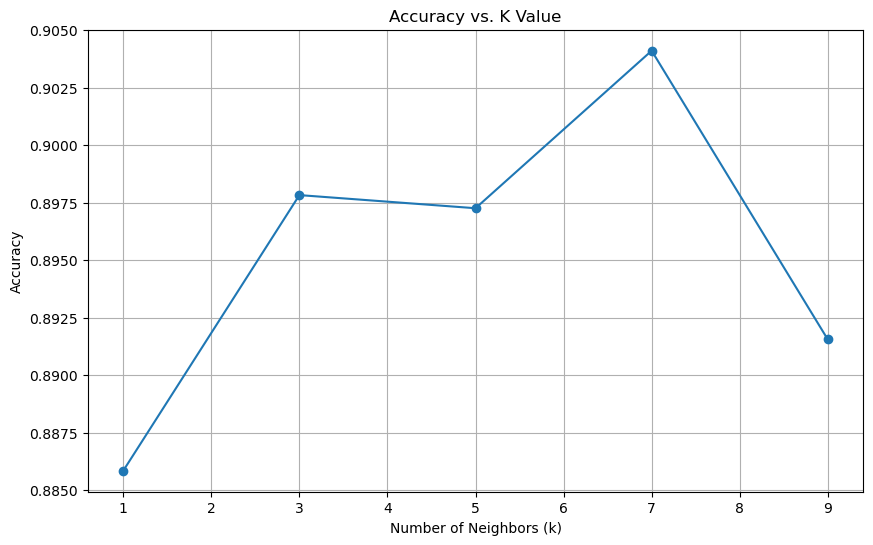

In [ ]:
# DataFrame to store metrics for each k
metrics_df = pd.DataFrame(columns=['k', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

for k in range(1, 10, 2):  # Looping from k=1 to k=9
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_trainKNN, y_trainKNN)
    y_predKNN = knn.predict(X_testKNN)

    # Calculate metrics
    accuracyKNN = accuracy_score(y_testKNN, y_predKNN)
    precisionKNN = precision_score(y_testKNN, y_predKNN, average='weighted')
    recallKNN = recall_score(y_testKNN, y_predKNN, average='weighted')
    f1KNN = f1_score(y_testKNN, y_predKNN, average='weighted')

    # Append to DataFrame
    metrics_df = metrics_df.append({'k': k, 'Accuracy': accuracyKNN, 'Precision': precisionKNN,
                                    'Recall': recallKNN, 'F1_Score': f1KNN}, ignore_index=True)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(metrics_df['k'], metrics_df['Accuracy'], marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()


After running our model through some hyperparameter tuning, it was found that the most optimum number of neighbors is when k = 7. When k = 7, the accuracy of the model increased to be slightly above 90.25%.

# K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# drop identifyer column and target variable from data set

features = df_encoded.drop(columns = ['Date','Rented Bike Count','Hour','High Demand'])

# Standardize the features
# scaler = StandardScaler()
scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(features)

# Applying K-Means clustering for k=3, 5, 7
kmeans_3 = KMeans(n_clusters=3, random_state=42).fit(scaled_features)
kmeans_5 = KMeans(n_clusters=5, random_state=42).fit(scaled_features)
kmeans_7 = KMeans(n_clusters=7, random_state=42).fit(scaled_features)

# Assigning the cluster labels to the DataFrame
#df_encoded['KMeans_3'] = kmeans_3.labels_
#df_encoded['KMeans_5'] = kmeans_5.labels_
#df_encoded['KMeans_7'] = kmeans_7.labels_

df_encoded.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons_Spring  \
0                      0.0           0.0            0.0               0   
1                      0.0           0.0            0.0               0   
2                      0.0           0.0            0.0               0   
3                      0.0           0.0            0.0               0   
4                      0.0           0.0            0.0               0   

   Seasons_Summer  Seasons_Winter  Holiday_No Holiday  Functioning Day_Yes  \
0               0               1                   1                    1   
1               0               1                   1                    1   
2               0               1                   1                    1   
3               0               1                   1                    1   
4               0               1                   1                    1   

   High Demand  
0            0  
1            0  
2            0  
3            0  
4            0

In [ ]:

# Accessing the centroids
centroids_3 = kmeans_3.cluster_centers_
centroids_5 = kmeans_5.cluster_centers_
centroids_7 = kmeans_7.cluster_centers_

# Creating DataFrames for the centroids
centroids_df_3 = pd.DataFrame(centroids_3, columns=features.columns)
centroids_df_5 = pd.DataFrame(centroids_5, columns=features.columns)
centroids_df_7 = pd.DataFrame(centroids_7, columns=features.columns)

# Print or use the DataFrames as needed
print("Centroids for k=3:")
print(centroids_df_3)

print("Centroids for k=5:")
print(centroids_df_5)


Centroids for k=3:
   Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0         0.548616     0.602055          0.227797          0.695734   
1         0.266775     0.507601          0.259822          0.719203   
2         0.775923     0.663076          0.217489          0.747463   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                   0.612554                 0.172090      0.004371   
1                   0.314591                 0.084710      0.000938   
2                   0.853809                 0.216265      0.007242   

   Snowfall (cm)  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0   3.182439e-03    5.027322e-01   -4.440892e-16    4.468648e-15   
1   2.812500e-02   -2.109424e-15   -2.109424e-15    1.000000e+00   
2  -2.081668e-17    1.221245e-15    1.000000e+00    4.468648e-15   

   Holiday_No Holiday  Functioning Day_Yes  
0            0.956284             0.932832  
1            0.911111             1.000000  
2  

In [ ]:
print("Centroids for k=7:")
print(centroids_df_7)

Centroids for k=7:
   Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0         0.504813     0.749041          0.167629          0.387281   
1         0.234523     0.410302          0.287213          0.916759   
2         0.775923     0.663076          0.217489          0.747463   
3         0.549413     0.468449          0.286497          0.856446   
4         0.581115     0.541720          0.216872          0.946307   
5         0.526054     0.771101          0.210038          0.299925   
6         0.336075     0.716666          0.200969          0.294716   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                   0.635139                 0.069477      0.010567   
1                   0.244286                 0.105395      0.000017   
2                   0.853809                 0.216265      0.007242   
3                   0.553258                 0.288948      0.001216   
4                   0.619957                 0.182355    